In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_wave import *

In [2]:
N = 8
K = 4
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K
t = 0.
t_target = 0.8

reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h


In [3]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)
dt = CF*dx_min
nt = int((t_target-t)/dt)

In [4]:
def v_ana(x,t):
    return 2*np.pi*np.cos(2*np.pi*(x+t))
def u_ana(x,t):
    return np.sin(2*np.pi*(x-t)) + 1/2*np.sin(2*np.pi*(x+t))

In [5]:
u = u_ana(x,0)
v = v_ana(x,0)

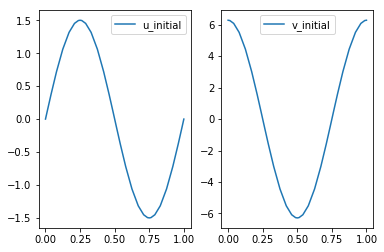

In [6]:
plt.subplot(1,2,1)
plt.plot(x.flatten(),u.flatten(), label = 'u_initial')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x.flatten(),v.flatten(), label = 'v_initial')
plt.legend()

In [7]:
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    u = RK4_Step(dt,DG_du_dt,u, K,N,t,a1,alpha,M_inv, M_inv_S,None,v)
    v = RK4_Step(dt,DG_du_dt,v, K,N,t,a2,alpha,M_inv, M_inv_S)
    t += dt 
    


In [8]:
t
analytical_u = u_ana(x,t)
analytical_v = v_ana(x,t)

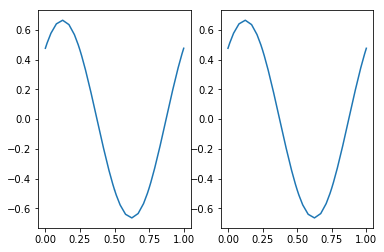

In [9]:
plt.subplot(1,2,1)
plt.plot(x.flatten(),u.flatten())
plt.subplot(1,2,2)
plt.plot(x.flatten(),analytical_u.flatten() )

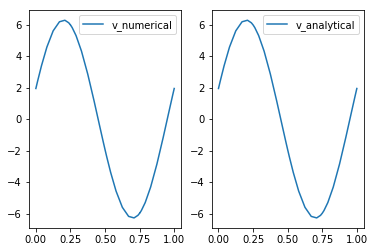

In [10]:
plt.subplot(1,2,1)
plt.plot(x.flatten(),v.flatten(), label = 'v_numerical')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x.flatten(),analytical_v.flatten(),label = 'v_analytical' )
plt.legend()

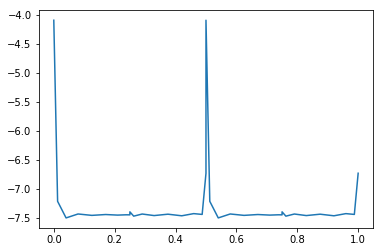

In [114]:
error = np.log10(np.abs((u-analytical_u)/analytical_u))
plt.plot(x.flatten(), error.flatten())

In [ ]:
#Scratch

In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])

In [ ]:
def addit(a,b = None):
    try: 
        return a+b
    except TypeError:
        return a

In [ ]:
addit(a,b)

In [ ]:
a = np.array([[1,2],[3,4]])

In [ ]:
addit(a)

In [ ]:
addit(a,b)

In [ ]:
addit(1,2)